# Auxiliary

In [57]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
import project
from project.utils import *

In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Models

In [738]:
from project.models.pbc import Box
from project.models.lj import LJFluid
from project.models.chain import GaussianChain
from project.models.ising import IsingModel
from project.models.nematic import NematicLattice

## LJ Fluid

In [73]:
lj = LJFluid(dim = 2)
x = lj.init_coords(4, init_try = 5000)

In [74]:
lj.energy(x)

-2.6171842482564043

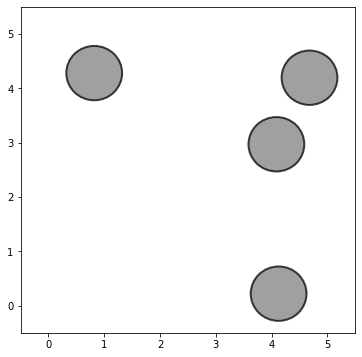

In [75]:
lj.draw_config(x)

In [101]:
idx, new = lj.step(x)

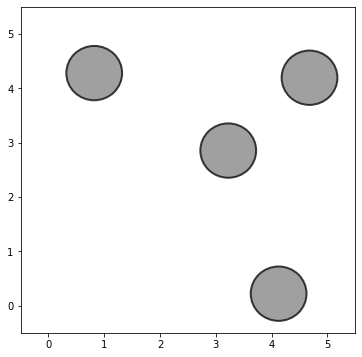

In [102]:
lj.draw_config(new)

## Gaussian Chain

In [110]:
chain = GaussianChain(r0 = 1.5, k = 10.0, L = 5)

chain.params

{'sig': 1.0, 'eps': 1.0, 'r0': 1.5, 'k': 10.0, 'L': 5}

In [114]:
N = 50
x = chain.init_coords(N)

chain.energy(x)

chain.energy_idx(x, 1)

-5.665211996199572

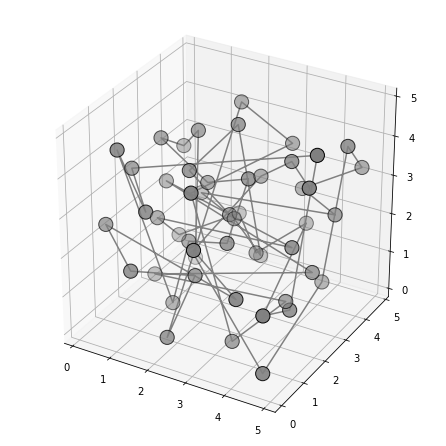

In [115]:
chain.draw_config(x)

In [118]:
%time chain.oprm(x)

CPU times: user 980 µs, sys: 361 µs, total: 1.34 ms
Wall time: 1.03 ms


37.57190312986356

In [119]:
chain.step(x)

(20, array([[2.5       , 2.5       , 2.5       ],
        [1.78576823, 1.94434093, 3.6962926 ],
        [2.39472596, 3.06357278, 4.48780417],
        [2.43229024, 4.06283342, 0.60586816],
        [2.139785  , 3.32731791, 1.88001792],
        [0.82521527, 4.0487988 , 1.84298095],
        [4.66713304, 3.49069596, 2.61587601],
        [3.39525086, 4.28336364, 2.55268065],
        [4.65103679, 4.79599018, 3.19316151],
        [4.8086211 , 3.751936  , 4.2585807 ],
        [4.28345998, 3.65930949, 0.66058859],
        [4.7670955 , 0.0556205 , 0.40288287],
        [0.71946631, 3.93195276, 0.11940332],
        [1.34971941, 3.06626352, 4.06899237],
        [0.4913851 , 3.82632909, 3.10174755],
        [0.65387026, 2.58031383, 3.92092064],
        [1.65335337, 2.95847754, 2.86829264],
        [2.95123323, 2.56254947, 3.50762731],
        [2.88061325, 1.73732047, 2.25702349],
        [1.58235965, 2.22531397, 1.68570927],
        [0.66879914, 1.89595586, 0.14701352],
        [0.58555088, 0.8710414

## Ising Model

In [131]:
ising = IsingModel(h = 1.0)

ising.params

{'h': 1.0, 'J': 1.0}

In [132]:
x = ising.init_coords(4)

ising.energy(x)

2.0

In [133]:
%time ising.energy_idx(x, 0)

CPU times: user 83 µs, sys: 8 µs, total: 91 µs
Wall time: 86.1 µs


-1.0

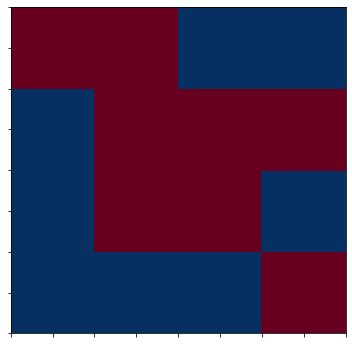

In [134]:
ising.draw_config(x)

In [135]:
ising.oprm(x)

0.0

In [137]:
ising.step(x)

(4, array([[-1, -1, -1,  1],
        [ 1,  1,  1, -1],
        [-1,  1,  1,  1],
        [ 1,  1, -1, -1]]))

## Nematic Lattice 

In [189]:
nem = NematicLattice()

In [195]:
x = nem.init_coords(5)

In [196]:
y = np.ones((5, 5, 5, 3)) + np.random.randn(*x.shape)

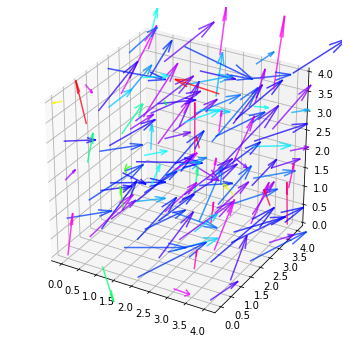

In [200]:
nem.draw_config(y, alpha = 0.75)

In [204]:
%time idx, new = nem.step(x)

CPU times: user 141 µs, sys: 10 µs, total: 151 µs
Wall time: 147 µs


In [205]:
%time nem.energy_idx(x, idx)

CPU times: user 121 µs, sys: 0 ns, total: 121 µs
Wall time: 125 µs


0.6146447812776412

In [209]:
%time nem.energy(new)

CPU times: user 1.92 ms, sys: 672 µs, total: 2.59 ms
Wall time: 2.11 ms


-5.240070474110686

# MCMC

In [92]:
from project.models.pbc import Box
from project.models.lj import LJFluid
from project.models.chain import GaussianChain
from project.models.ising import IsingModel
from project.models.nematic import NematicLattice

In [93]:
from project.mcmc.metropolis import MetropolisSampler

## Metropolis

In [161]:
model = NematicLattice(J = 2.5, h = 5.0)

x0 = model.init_coords(8)

met = MetropolisSampler(model, x0, temperature = 1.0, burnin = 20000, stride = 500)

In [162]:
met.run(250000, verbose = 10000)

Step 0 / 250000
Step 10000 / 250000
Step 20000 / 250000
Step 30000 / 250000
Step 40000 / 250000
Step 50000 / 250000
Step 60000 / 250000
Step 70000 / 250000
Step 80000 / 250000
Step 90000 / 250000
Step 100000 / 250000
Step 110000 / 250000
Step 120000 / 250000
Step 130000 / 250000
Step 140000 / 250000
Step 150000 / 250000
Step 160000 / 250000
Step 170000 / 250000
Step 180000 / 250000
Step 190000 / 250000
Step 200000 / 250000
Step 210000 / 250000
Step 220000 / 250000
Step 230000 / 250000
Step 240000 / 250000


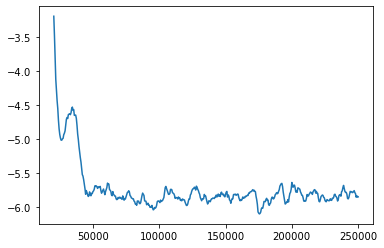

In [163]:
plt.plot(met.steps, met.etraj)

plt.show()

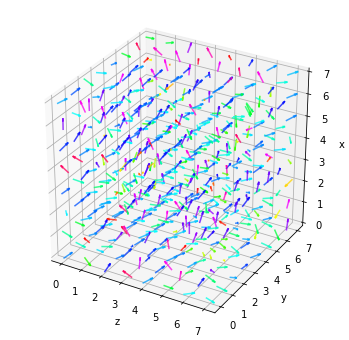

In [164]:
met.model.draw_config(met.traj[0])

0.3144388859686644


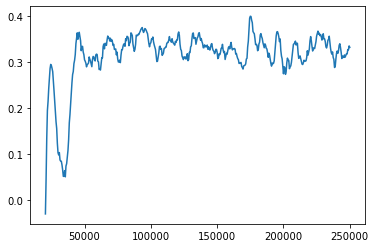

In [165]:
oprm = [model.oprm(c) for c in met.traj]
print(np.mean(oprm))

plt.plot(met.steps, oprm)

plt.show()